In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [2]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [3]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [4]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [5]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [6]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [7]:
def huber_loss(labels, predictions, delta=1.0):
    error = predictions - labels
    abs_error = tf.abs(error)
    return tf.where(tf.less_equal(abs_error, delta),
                   0.5 * tf.square(error),
                   0.5 * tf.square(error) + delta * (abs_error - delta))

In [8]:
loss = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [10]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [11]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [12]:
for i in range(100): 
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    #print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

# Comparison of different loss functions

In [13]:
losses = [tf.square(Y - Y_predicted)]

deltas = [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100, 200]

for d in deltas:
    losses.append(huber_loss(Y, Y_predicted, delta=d))

ws = []
bs = []

for loss in losses:
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        print("training for the next loss function has started")
        
        n_epochs = 100
        for i in range(n_epochs): # train the model 
            total_loss = 0
            for x, y in data:
                # Session runs train_op and fetch values of loss
                _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
                total_loss += l
                
        cur_w, cur_b = sess.run([w, b])
        ws.append(cur_w)
        bs.append(cur_b)

training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started
training for the next loss function has started


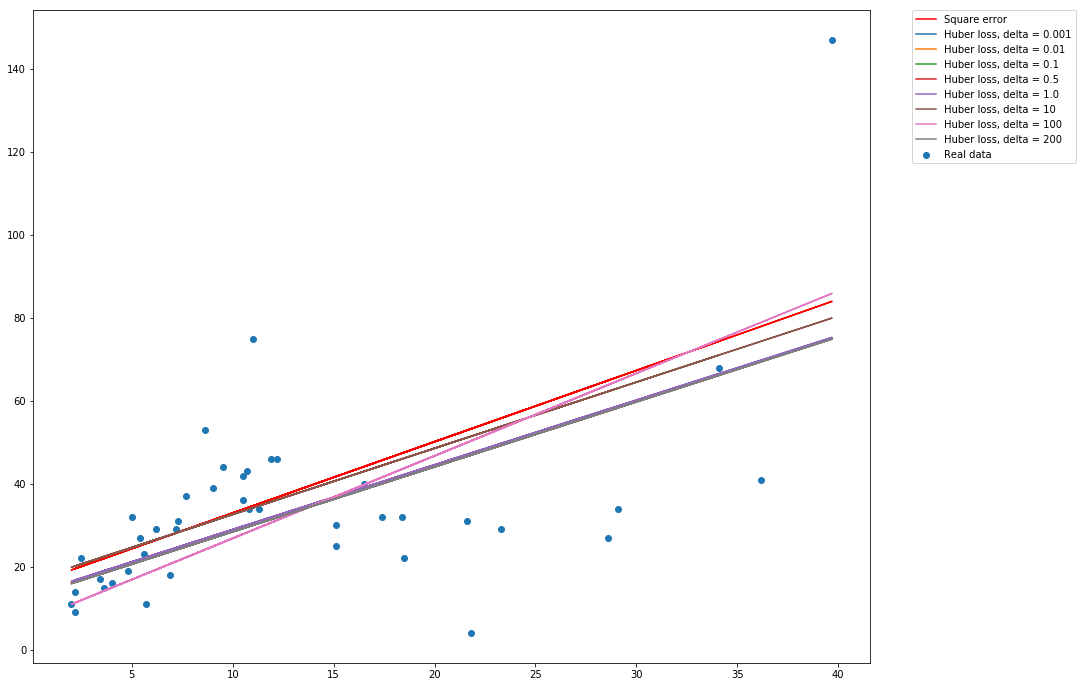

In [14]:
plt.figure(figsize=(15, 12))

X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, ws[0] * X + bs[0], label="Square error", color='r')

for i in range(1, len(losses)):
    plt.plot(X, ws[i] * X + bs[i], label="Huber loss, delta = %s" % deltas[i - 1])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Let's zoom a bit.

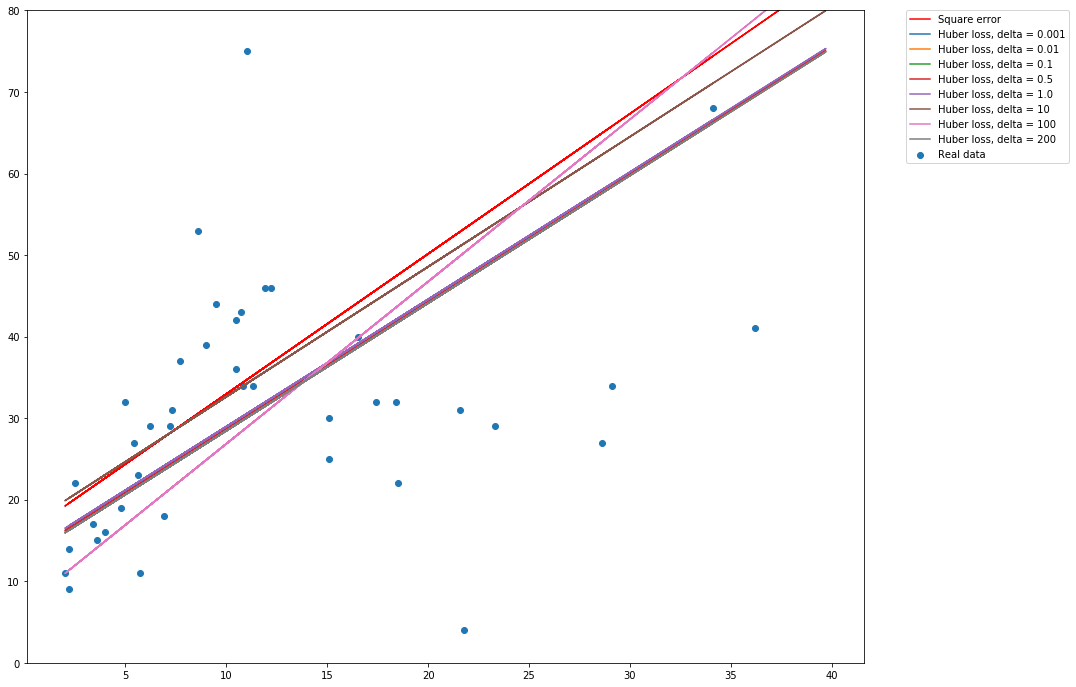

In [16]:
plt.figure(figsize=(15, 12))

X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, ws[0] * X + bs[0], label="Square error", color='r')

for i in range(1, len(losses)):
    plt.plot(X, ws[i] * X + bs[i], label="Huber loss, delta = %s" % deltas[i - 1])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,80))
plt.show()